In [1]:
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

from utilidades.validar import validar
from utilidades.reducir_uso_memoria import reduce_mem_usage
from utilidades.dolarizar import dolarizar
from utilidades.dolarizar import desdolarizar
from utilidades.dolarizar import agregar_dolar_como_feature
from utilidades.generar_submit import generar_submit
from utilidades.subir_submit import subir


from sklearn.preprocessing import StandardScaler

from sklearn.neural_network import MLPRegressor

In [2]:
train = pd.read_csv("data/esteban/train_limpio_idz.csv")
test = pd.read_csv("data/esteban/test_limpio_idz.csv")

#col_train = pd.read_csv("data/ftr_poblacion_train.csv")
#col_test = pd.read_csv("data/ftr_poblacion_test.csv")

In [4]:
#train = reduce_mem_usage(train)
#test = reduce_mem_usage(test)

In [5]:
X, y = train.drop(["precio"] , axis=1),train["precio"]

### Graficamos las predicciones contra los valores reales:

In [6]:
scaling = StandardScaler().fit(X)
X2 = scaling.transform(X)
X2 = pd.DataFrame(data = X2, columns = X.columns)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.33, random_state=42)

In [8]:
%%time

#663941

#hidden_layer_sizes=(948,100)
reg = MLPRegressor(max_iter = 1000, learning_rate_init = 0.0002, activation='logistic')
y_train_l = np.log(y_train)
reg.fit(X_train, y_train_l)
pred = reg.predict(X_test)
pred = np.exp(pred)

mean_absolute_error(y_test, pred)

Wall time: 36min 48s


663941.7810562637

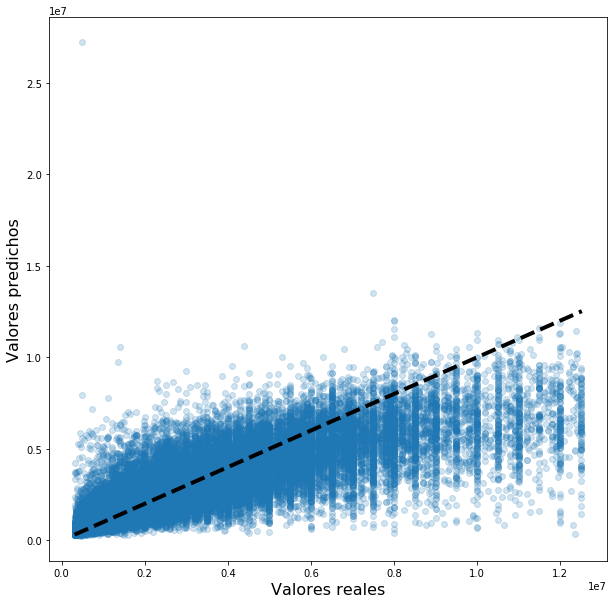

In [9]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(y_test, pred, alpha = 0.2)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel("Valores reales", fontsize=16)
ax.set_ylabel("Valores predichos", fontsize=16);

### Se puede ver que el modelo es bastante conservador en el sentido de que casi nunca predice valores muy altos, por lo que se observa un alejamiento respecto la diagonal ideal a medida que los precios reales aumentan